# Analysis of the Palmer Penguins Dataset.
*By Laura Lyons*
***

## **1.0    Introduction**
***
The Palmer Penguin’s data set is a collaboration of 3 sets of field results, collected by K.B. Gorman, at the Palmer Station in Antarctica, between 2007- 2009 and published in 2020. Three penguin species of the genus *Pygoscelis* were studied to analyis potential sexual and ecologial dimorphisim due to differing habitat preference (Figure 1.1). Since then, the data was released for public use as a teaching tool for data exploration and visualisation.  (Gorman *et. al* 2020). 

The raw data set is available [on GitHub](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv)

|<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Hope_Bay-2016-Trinity_Peninsula%E2%80%93Ad%C3%A9lie_penguin_%28Pygoscelis_adeliae%29_04.jpg/346px-Hope_Bay-2016-Trinity_Peninsula%E2%80%93Ad%C3%A9lie_penguin_%28Pygoscelis_adeliae%29_04.jpg" alt="*P.adelidae*" width="200" height="300"/> |<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/South_Shetland-2016-Deception_Island%E2%80%93Chinstrap_penguin_%28Pygoscelis_antarctica%29_04.jpg/800px-South_Shetland-2016-Deception_Island%E2%80%93Chinstrap_penguin_%28Pygoscelis_antarctica%29_04.jpg" alt="*P.antarctica*" width="200" height="300"/>|<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Brown_Bluff-2016-Tabarin_Peninsula%E2%80%93Gentoo_penguin_%28Pygoscelis_papua%29_03.jpg/1024px-Brown_Bluff-2016-Tabarin_Peninsula%E2%80%93Gentoo_penguin_%28Pygoscelis_papua%29_03.jpg" alt="*P.papua*" width="300" height="450" />|
|:---------:|:---------:|:---------:|
| *P. adelidae*| *P. antarctica*| *P. papua*|

Figure 1.1 Three species *Pygoscelis* penguins studied during the Palmer Penguins Dataset.

*Reference: Pictures by Andrew Shiva / Wikipedia, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=46674168*

## **2.0    Methods**
***

#### 2.1    Prerequisites/ Imports

A number of imports were used to help with the data analysis and visualisation.

1. **Pandas**: for for the DataFrame data structure and forstoring, manipulating and working with structured data. It allows us to investigate CSV files, amongst other features.

1. **Numpy**: as it creates efficient data structures for dealing with numerical data in python. Reference Lecture 5. Module Principles of Data Analytics.

1. **Matplotlib.pyplot:** for creating plots

1. **Seaborn**: matplotlib sub-library for creating attractive data visualisation

In [1]:
# Data frames
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.stats import norm

#### 2.2    Load the Data
The palmer penguins data set was loaded from a URL.

In [2]:
# Load the penguins data set.
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')

Once the data was loaded, it allowed analyse/ investigate the data to begin

## **3.0 Results**
***

#### 3.1    Data Frame Analysis

In [3]:
# An overview of the data was retrieved so that we could decifer the type and number of variables present. 
df 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
# Before we delve into our data analysis, it wouldbe good practice to check for the presnece of missing values.
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

From the above table, we can see that there are 19 missing values, present 5 of the 7 variables.

In [5]:
# It would be useful to know how many of each species were analised and also how many male and female penguins were measured within each species.

df ['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [6]:
# This will help detail the names of the islands were the penguins were measured and also how many were measures at each island.
df ['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [7]:
# Lets look at the last col. Sex ie the number of penguins of each sex.
df ['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

From the above table, we can see that there were 344 penguins were analyised for 7 different variables.
1. Species (152 Adelie, 124 Gentoo and 68 Chinstrap).
1. Island (168 penguins were measured on Brisceo Island, 124 on Dream Island and 52 on Torgersen Island)
1. Bill Length (mm)
1. Bill depth (mm)
1. Flipper length (mm) 
1. Body mass (g)
1. Sex (168 ,male penguins and 165 females)

In [8]:
# Describe the data set.
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [15]:
# Filter the data by the species.
adelie_df = df[df["species"] == "adelie"]
gentoo_df=df[df["species"] == "gentoo"]
chinstrap_df=df[df["species"] == "chinstrap"]

summary_adelie = adelie_df.describe().map(lambda x: f"{x:0.2f}")
summary_gentoo = gentoo_df.describe().map(lambda x: f"{x:0.2f}")
summary_chinstrap = chinstrap_df.describe().map(lambda x: f"{x:0.2f}")

df['species'].describe()

count        344
unique         3
top       Adelie
freq         152
Name: species, dtype: object

c:\Users\Laura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Laura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Laura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Laura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

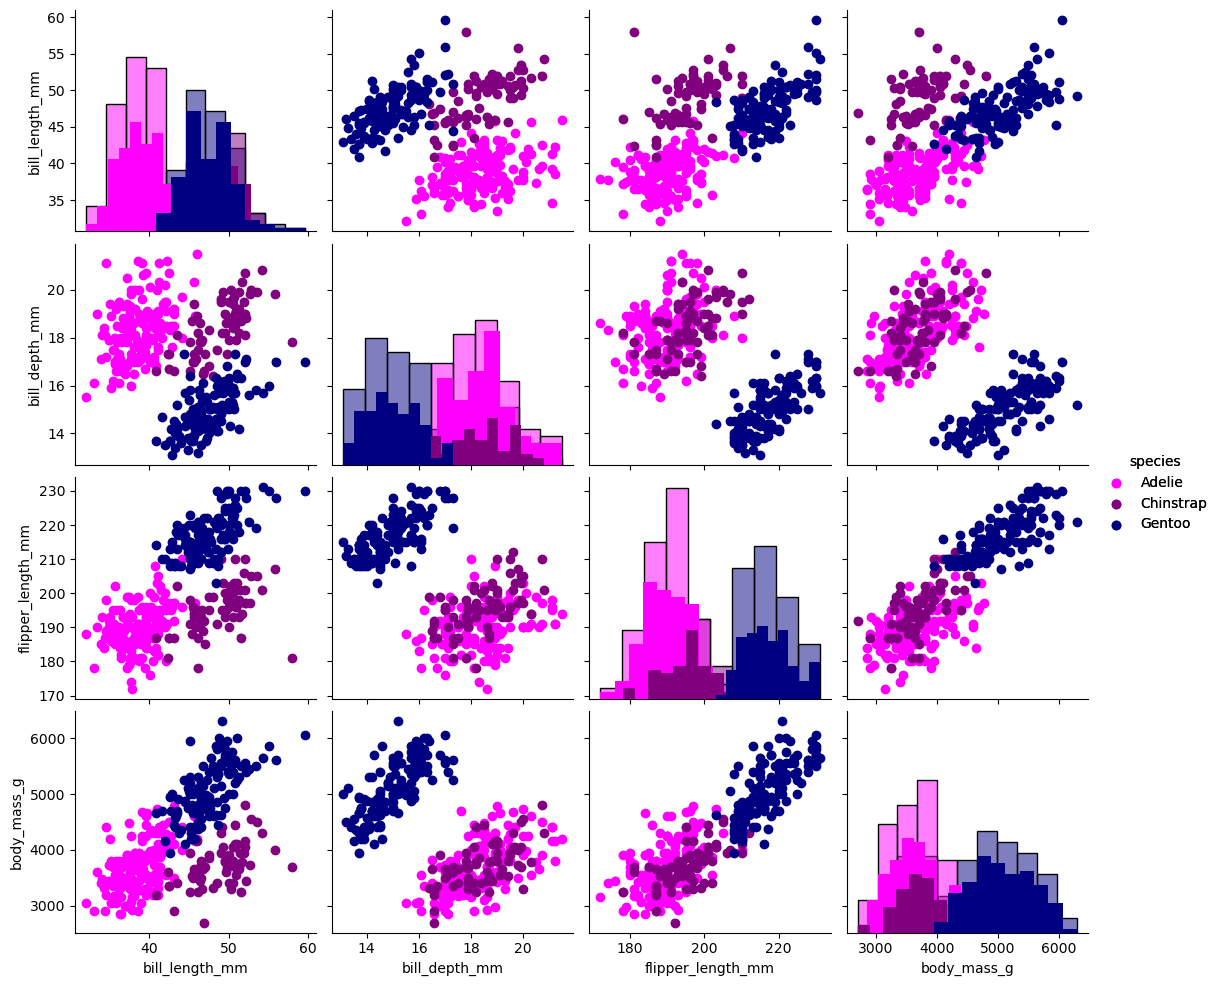

In [18]:
# Seanbord: Pairplot can be used to create a figure containing a histogram for all 
# Reference: <https://seaborn.pydata.org/generated/seaborn.PairGrid.html>

sns.pairplot(df, hue = "species", diag_kind = "hist", palette = ["magenta","purple","navy"])
plt.show()

### References

Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081


***
### End